In [2]:
import numpy as np
import pandas as pd
import requests
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr
from collections import Counter

In [3]:
coller_optimality_index = {
    "GCC":55,
    "CUG":5,
    "GGC":36,
    "CGG":16,
    "CGC":21,
    "CCC":25,
    "GUG":23,
    "GCG":22,
    "CCG":4,
    "GAC":40,
    "CUC":11,
    "UCG":17,
    "AGC":9,
    "ACC":50,
    "ACG":6,
    "GGG":24,
    "GUC":58,
    "AUC":49,
    "UCC":51,
    "UUC":46,
    "UGC":29,
    "UAC":47,
    "GAG":19,
    "CAC":42,
    "CAG":12,
    "UGG":35,
    "AAC":41, #last sub-optimal codon
    "AAG":48,
    "CGU":44,
    "GCU":60,
    "CGA":1,
    "AUG":31,
    "AGG":2,
    "CCU":37,
    "GGU":59,
    "CCA":54,
    "GCA":27,
    "UUG":57,
    "CUA":13,
    "GUA":3,
    "CUU":14,
    "UCU":52,
    "GUU":56,
    "UGU":34,
    "UUU":30,
    "GAU":32,
    "AGU":7,
    "ACA":10,#/
    "GGA":18,
    "UAU":26,
    "UUA":33,
    "UCA":20,
    "CAU":28,
    "ACU":53,
    "AUU":39,
    "AUA":0,
    "AAU":15,
    "CAA":43,
    "AGA":38,
    "GAA":45,
    "AAA":8   
}

In [51]:
coller_optimality = {
    "AUA":-0.2562,
    "CGA":-0.1966,
    "AGG":-0.1926,
    "GUA":-0.1892,
    "CCG":-0.1803,
    "CUG":-0.1641,
    "AGU":-0.1551,
    "ACG":-0.1551,
    "AGC":-0.1485,
    "AAA":-0.1485,
    "ACA":-0.1423,
    "CUC":-0.1362,
    "CAG":-0.1305,
    "CUA":-0.1286,
    "AAU":-0.1284,
    "CUU":-0.1282,
    "CGG":-0.1272,
    'UCG':-0.1259,
    'GGA':-0.1232,
    'GAG':-0.1188,
    'UCA':-0.1158,
    'GCG':-0.1016,
    'CGC':-0.1016,
    'GUG':-0.09528,
    'GGG':-0.09315,
    'CCC':-0.08799,
    'UAU':-0.08729,
    'CAU':-0.08582,
    'GCA':-0.08455,
    'UGC':-0.08053,
    'UUU':-0.07788,
    'AUG':-0.06376,
    'GAU':-0.05355,
    'UUA':-0.03692,
    'UGU':-0.0324,
    'UGG':-0.02225,
    'GGC':-0.01154,
    'CCU':-0.0006258,
    'AGA':0.0419,
    'AUU':0.04863,
    'GAC':0.06078,
    'AAC':0.06772,
    'CAC':0.06833,
    'CAA':0.07218,
    'CGU':0.07926,
    'GAA':0.09142,
    'UUC':0.09424,
    'UAC':0.09978,
    'AAG':0.1029,
    'AUC':0.1121,
    'ACC':0.1267,
    'UCC':0.1349,
    'UCU':0.142,
    'ACU':0.1434,
    'CCA':0.1561,
    'GCC':0.176,
    'GUU':0.1911,
    'UUG':0.1994,
    'GUC':0.1995,
    'GGU':0.2134,
    'GCU':0.2489
}

In [4]:
codon_optimality_index = {
    "GCC":0,
    "CUG":1,
    "GGC":2,
    "CGG":3,
    "CGC":4,
    "CCC":5,
    "GUG":6,
    "GCG":7,
    "CCG":8,
    "GAC":9,
    "CUC":10,
    "UCG":11,
    "AGC":12,
    "ACC":13,
    "ACG":14,
    "GGG":15,
    "GUC":16,
    "AUC":17,
    "UCC":18,
    "UUC":19,
    "UGC":20,
    "UAC":21,
    "GAG":22,
    "CAC":23,
    "CAG":24,
    "UGG":25,
    "AAC":26, #last sub-optimal codon
    "AAG":27,
    "CGU":28,
    "GCU":29,
    "CGA":30,
    "AUG":31,
    "AGG":32,
    "CCU":33,
    "GGU":34,
    "CCA":35,
    "GCA":36,
    "UUG":37,
    "CUA":38,
    "GUA":39,
    "CUU":40,
    "UCU":41,
    "GUU":42,
    "UGU":43,
    "UUU":44,
    "GAU":45,
    "AGU":46,
    "ACA":47,
    "GGA":48,
    "UAU":49,
    "UUA":50,
    "UCA":51,
    "CAU":52,
    "ACU":53,
    "AUU":54,
    "AUA":55,
    "AAU":56,
    "CAA":57,
    "AGA":58,
    "GAA":59,
    "AAA":60    
}

In [5]:
indexes = pd.DataFrame({"codon":codon_optimality_index.keys(),"gillen_optimality_rank":codon_optimality_index.values(),"coller_optimality_rank":coller_optimality_index.values()})

In [6]:
r, p_val = pearsonr(indexes['gillen_optimality_rank'],indexes['coller_optimality_rank'])
print(f'r: {r:.3f}, p: {p_val:.3f}')

r: 0.018, p: 0.888


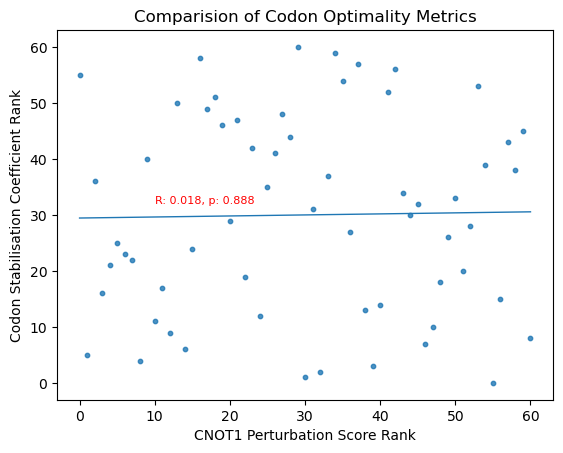

In [13]:
ax = sns.regplot(data=indexes, x="gillen_optimality_rank",y='coller_optimality_rank',ci=False,scatter_kws={'s':10}, line_kws={'linewidth':1})
r, p_val = pearsonr(indexes['gillen_optimality_rank'],indexes['coller_optimality_rank'])
print(f'r: {r:.3f}, p: {p_val:.3f}')
plt.text(x=10,y=32,s = f'R: {r:.3f}, p: {p_val:.3f}', color='red',fontsize=8)
ax.set_xlabel('CNOT1 Perturbation Score Rank')
ax.set_ylabel('Codon Stabilisation Coefficient Rank')
ax.set_title('Comparision of Codon Optimality Metrics')
plt.show()

In [34]:

gillen_df = pd.DataFrame({'Codon':codon_optimality_index.keys(), 'Optimality Score':codon_optimality_index.values()})
gc_ending = ['GC Ending' if codon[2] =='G' or codon[2] == 'C' else 'AT Ending' for codon in gillen_df['Codon']]
gillen_df['Codon Type'] = gc_ending

In [38]:
gillen_df.isna().sum()

Codon               0
Optimality Score    0
Codon Type          0
dtype: int64

/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

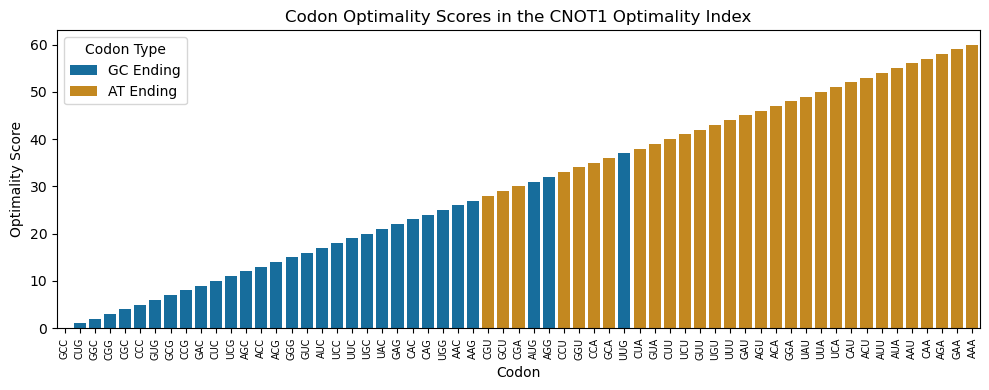

In [46]:
plt.figure(figsize=(10,4))
ax=sns.barplot(data=gillen_df, x='Codon', y='Optimality Score',hue='Codon Type',palette='colorblind',dodge=False)
ax.set_xticklabels(gillen_df['Codon'],rotation=90,fontsize=7)
ax.set_xticks(range(61))
ax.set_title('Codon Optimality Scores in the CNOT1 Optimality Index')
#ax.tick_params(axis='x', which='major', pad=15)  # Adjust the value of 'pad' as needed
# Show the plot
plt.tight_layout()
plt.show()

In [50]:
per_aa_codon_optimality_index = {'UUU':1,#Phe
                                 'UUC':19/44,
                                 'UUA':1,#Leu
                                 'UUG':0.74,
                                 'CUU':0.8,
                                 'CUC':0.2,
                                 'CUA':0.76,
                                 'CUG':0.04,
                                 'AUU':54/55,#Ile
                                 'AUC':17/55,
                                 'AUA':1,
                                 'AUG':1,#Met
                                 'GUU':1,#Val
                                 'GUC':16/42,
                                 'GUA':39/42,
                                 'GUG':6/42,
                                 'UCU':41/51, #Ser
                                 'UCC':18/51,
                                 'UCA':1,
                                 'UCG':11/51,
                                 'CCU':33/35,#Pro
                                 'CCC':5/35,
                                 'CCA':1,
                                 'CCG':8/35,
                                 'ACU':1, #Thr
                                 'ACC':13/53,
                                 'ACA':47/53,
                                 'ACG':14/53,
                                 'GCU':29/36,#Ala
                                 'GCC':0,
                                 'GCA':1,
                                 'GCG':7/36,
                                 'UAU':1,#Tyr
                                 'UAC':21/49,
                                 'CAU':1, #His
                                 'CAC':23/52,
                                 'CAA':1, #Gln
                                 'CAG':24/57,
                                 'AAU':1, #Asn
                                 'AAC':26/56,
                                 'AAA':1, #Lys
                                 'AAG':27/60,
                                 'GAU':1, #Asp
                                 'GAC':9/45,
                                 'GAA':1, #Glu
                                 'GAG':22/59,
                                 'UGU':1, #Cys
                                 'UGC':20/43,
                                 'UGG':1, #Trp
                                 'CGU':28/58, #Arg
                                 'CGC':4/58,
                                 'CGA':30/58,
                                 'CGG':3/58,
                                 'AGA':1,
                                 'AGG':32/58,
                                 'AGU':1, #Ser
                                 'AGC':12/46,
                                 'GGU':34/48, #Gly
                                 'GGC':2/48,
                                 'GGA':1,
                                 'GGG':15/48
}

In [48]:
def getCodonOptimality(sequence,optimality_index):
    if sequence is not None:
        score_list = []
        stop_codons = ['UAG','UAA','UGA']
        rna_sequence = sequence.replace('T','U')
        rna_sequence = rna_sequence.replace('\n','')
        pre_orf = True
        for i in range(0,len(rna_sequence)-2,3):
            codon = rna_sequence[i:i+3]
            if codon in stop_codons:
                    break
            else:
                try:
                    score_list.append(optimality_index[codon])
                except KeyError:
                    score_list.append(30)
        codon_opt_score = np.mean(score_list)
    else:
        codon_opt_score = None
    return codon_opt_score, len(score_list)

In [5]:
def getCDNA(gene_id,fail_list):
    # Define the Ensembl REST API endpoint
    ensembl_api_url = 'https://rest.ensembl.org/'

    # Define the species (human)
    species = 'human'

    # Define the endpoint URL to retrieve the top transcript ID for the specified gene
    transcript_url = f"{ensembl_api_url}lookup/id/{gene_id}?expand=1;species={species}"

    # Send GET request to retrieve information about the gene
    response_transcript = requests.get(transcript_url, headers={"Content-Type": "application/json"})
    
    if response_transcript.status_code == 200:
        # Extract the top transcript ID from the response
        top_transcript_id = response_transcript.json()['Transcript'][0]['id']

        # Define the endpoint URL to retrieve cDNA sequence for the top transcript ID
        request_url = f"{ensembl_api_url}sequence/id/{top_transcript_id}?type=cdna;species={species}"

        # Send GET request to retrieve cDNA sequence for the top transcript ID
        response_cDNA = requests.get(request_url, headers={"Content-Type": "text/plain"})

        if response_cDNA.status_code == 200:
            sequence = response_cDNA.text
            with open(f'/mnt/scratchc/ghlab/transcripts/{gene_id}.txt','w') as file:
                file.write(sequence)
            
            #print(f"cDNA sequence for the top transcript ID {top_transcript_id} (gene ID {gene_id}, human):\n{cDNA_sequence}")
        else:
            print(f"Error fetching cDNA sequence: {response_cDNA.status_code}")
            fail_list.append(gene_id)
    else:
        print(f"Error fetching transcript information: {response_transcript.status_code}")
        fail_list.append(gene_id)

In [4]:
def get_cds_sequence(gene_id, fail_list):
    # Define the Ensembl REST API endpoint
    ensembl_api_url = 'https://rest.ensembl.org/'

    # Define the species (human)
    species = 'human'

    # Define the endpoint URL to retrieve the top transcript ID for the specified gene
    transcript_url = f"{ensembl_api_url}lookup/id/{gene_id}?expand=1;species={species}"

    # Send GET request to retrieve information about the gene
    response_transcript = requests.get(transcript_url, headers={"Content-Type": "application/json"})

    if response_transcript.status_code == 200:
        # Extract the top transcript ID from the response
        top_transcript_id = response_transcript.json()['Transcript'][0]['id']

        # Define the endpoint URL to retrieve CDS sequence for the top transcript ID
        request_url = f"{ensembl_api_url}sequence/id/{top_transcript_id}?type=cds;species={species}"

        # Send GET request to retrieve CDS sequence for the top transcript ID
        response_cds = requests.get(request_url, headers={"Content-Type": "text/plain"})

        if response_cds.status_code == 200:
            cds_sequence = response_cds.text
            with open(f'/mnt/scratchc/ghlab/cds_sequences/{gene_id}.txt', 'w') as file:
                file.write(cds_sequence)
        else:
            print(f"Error fetching CDS sequence: {response_cds.status_code}")
            fail_list.append(gene_id)
    else:
        print(f"Error fetching transcript information: {response_transcript.status_code}")
        fail_list.append(gene_id)


In [47]:
token_dict = []
with (open("/mnt/scratchc/ghlab/Geneformer/geneformer/token_dictionary.pkl", "rb")) as openfile:
    while True:
        try:
            token_dict.append(pickle.load(openfile))
        except EOFError:
            break

ensg_list = list(token_dict[0].keys())
ensg_list.pop(0)
ensg_list.pop(0)

'<mask>'

In [ ]:

fail_list=[]
for gene in ensg_list[10000:]:
    get_cds_sequence(gene,fail_list)
    

Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching transcript information: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching transcript information: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching transcript information: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetching CDS sequence: 400
Error fetchin

In [ ]:
scores_list=[]
per_aa_scores_list=[]
present_genes=[]
missing_genes=[]
n_codon_list=[]
counter = 0

for ensg_id in ensg_list:
    try:
        with open(f'/mnt/scratchc/ghlab/cds_sequences/{ensg_id}.txt') as file:
                sequence=file.read()
                score, n_codons = getCodonOptimality(sequence, coller_optimality)
                aa_score, n_codons = getCodonOptimality(sequence, per_aa_codon_optimality_index)
                scores_list.append(score)
                per_aa_scores_list.append(aa_score)
                present_genes.append(ensg_id)
                n_codon_list.append(n_codons)
    except FileNotFoundError:
        missing_genes.append(ensg_id)
    
df = pd.DataFrame({'ensembl_id':present_genes,'codon_opt_score':scores_list,'per_aa_codon_opt_score':per_aa_scores_list,'n_codons':n_codon_list})
df.to_csv('/mnt/scratchc/ghlab/in_silico_perturb_data/cds_coller_codon_optimalities.csv',index=False)


In [ ]:
scores_list=[]
present_genes=[]
missing_genes=[]
n_codons_list=[]

for ensg_id in ensg_list:
    try:
        with open(f'/mnt/scratchc/ghlab/transcripts/{ensg_id}.txt') as file:
                sequence=file.read()
                score, n_codons = getCodonOptimality(sequence, codon_optimality_index)
                scores_list.append(score)
                n_codons_list.append(n_codons)
                present_genes.append(ensg_id)
    except FileNotFoundError:
        missing_genes.append(ensg_id)
    
df = pd.DataFrame({'ensembl_id':present_genes,'codon_opt_score':scores_list,'n_codons':n_codon_list})
df.to_csv('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/cds_codon_optimalities.csv',index=False)


In [ ]:
codon_opt_df.to_csv('/mnt/scratchc/ghlab/in_silico_perturb_data/codon_optimalities.csv',index=False)

In [ ]:
codon_opt_df[codon_opt_df['n_codons'] == 33423]

In [ ]:
plt.hist(codon_opt_df['per_aa_codon_opt_score'], bins=20)

In [ ]:
with open('/mnt/scratchc/ghlab/in_silico_perturb_data/missing_genes.csv','w') as file:
    for gene in missing_genes:
        file.write(gene+',')


/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


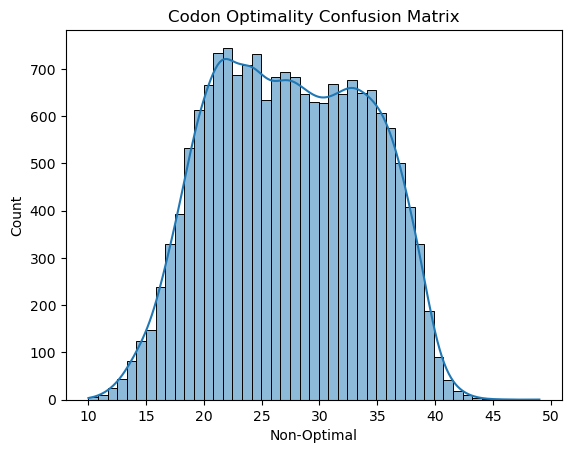

In [7]:
opts = pd.read_csv('/mnt/scratchc/ghlab/in_silico_perturb_data/cds_codon_optimalities.csv')
ax = sns.histplot(data=opts, x='codon_opt_score', kde=True)
ax.set_xlabel('Non-Optimal')
ax.set_ylabel('Count')
ax.set_title('Codon Optimality Confusion Matrix')
plt.show()